In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

<IPython.core.display.Javascript object>

In [3]:
STABILITY_API_KEY = os.environ.get("STABILITY_API_KEY")


<IPython.core.display.Javascript object>

In [4]:
stability_api = client.StabilityInference(
    key=STABILITY_API_KEY, verbose=False, engine="stable-diffusion-v1-5",
)

<IPython.core.display.Javascript object>

In [5]:
response = stability_api.generate(
    prompt="houston, we are a 'go' for launch!",
    seed=34567,
    steps=30,
    # cfg_scale=8.0,
    # width=512,
    # height=512,
    # samples=1,
    # sampler=generation.SAMPLER_K_DPMPP_2M,
)

<IPython.core.display.Javascript object>

image file name:  images/image_34567.png


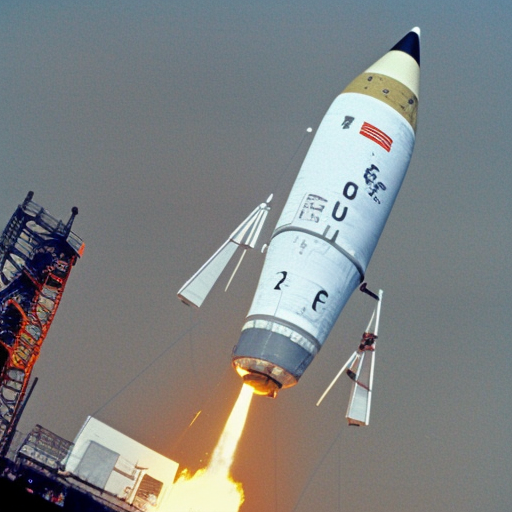

<IPython.core.display.Javascript object>

In [6]:
for resp in response:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn("Safety filters activated")
        if artifact.type == generation.ARTIFACT_IMAGE:
            file_name = "images/image_" + str(artifact.seed) + ".png"
            print("image file name: ", file_name)
            with open(file_name, "wb") as image_file:
                image_file.write(artifact.binary)
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)

In [7]:
response = stability_api.generate(
    prompt="sketchy crayon drawing of a starship in space on old paper",
    init_image=img,
    start_schedule=0.6,
    seed=54321,
    steps=30,
    cfg_scale=7.0,
    width=512,
    height=512,
    samples=1,
    sampler=generation.SAMPLER_K_DPMPP_2M,
)

<IPython.core.display.Javascript object>

image file name:  images/image_54321.png


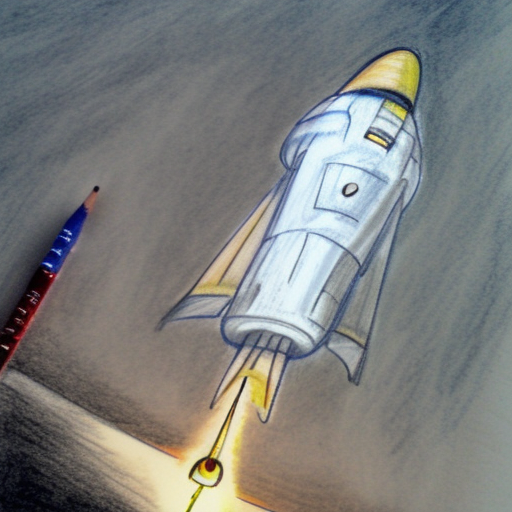

<IPython.core.display.Javascript object>

In [8]:
for resp in response:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn("Safety filters activated")
        if artifact.type == generation.ARTIFACT_IMAGE:
            file_name = "images/image_" + str(artifact.seed) + ".png"
            print("image file name: ", file_name)
            with open(file_name, "wb") as image_file:
                image_file.write(artifact.binary)
            img2 = Image.open(io.BytesIO(artifact.binary))
            display(img2)

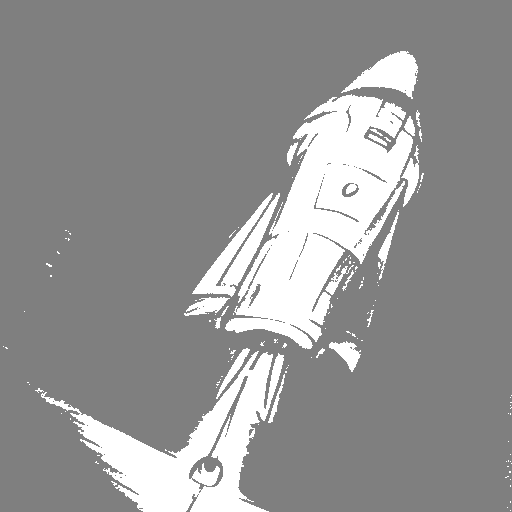

<IPython.core.display.Javascript object>

In [22]:
import numpy as np

img2_grayscale = img2.convert("L")

img2_a = np.array(img2_grayscale)
mask = np.array(img2_grayscale)

mask[img2_a < 150] = 0  # inpainting area - gray in mask
mask[img2_a >= 150] = 1  # area outside inpainting area

strength = 0.5  # This controls the strength of our prompt relative to the init image.

d = int(255 * (1 - strength))
mask *= 255 - d  # Converts our range from [0,1] to [0,255]
mask += d


mask = Image.fromarray(mask)
mask

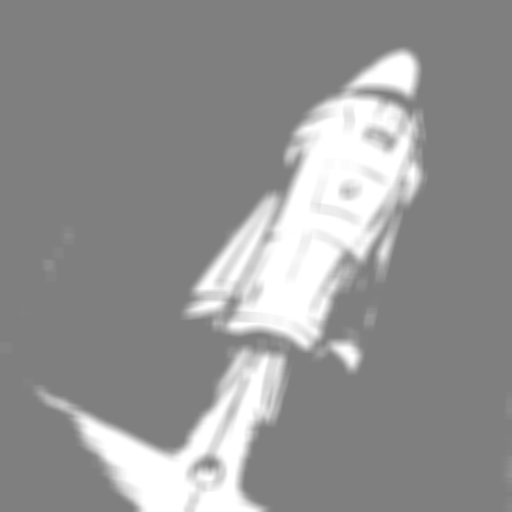

<IPython.core.display.Javascript object>

In [23]:
# Feathering the edges of our mask generally helps provide a better result.

from torchvision.transforms import GaussianBlur

blur = GaussianBlur(11, 20)
mask = blur(mask)
mask

In [24]:
response = stability_api.generate(
    prompt="rainbow galactic nebula, star-filled sky, spectral, psychedelic, masterpiece, artstation",
    init_image=img2,
    mask_image=mask,
    start_schedule=1,
    seed=1823948,
    steps=30,
    cfg_scale=8.0,
    width=512,
    height=512,
    sampler=generation.SAMPLER_K_DPMPP_2M,
)

<IPython.core.display.Javascript object>

image file name:  images/image_1823948.png


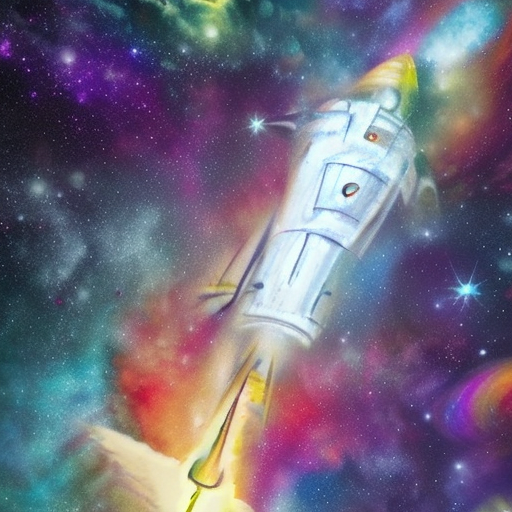

<IPython.core.display.Javascript object>

In [25]:
for resp in response:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn("Safety filters activated")
        if artifact.type == generation.ARTIFACT_IMAGE:
            file_name = "images/image_" + str(artifact.seed) + ".png"
            print("image file name: ", file_name)
            with open(file_name, "wb") as image_file:
                image_file.write(artifact.binary)
            img3 = Image.open(io.BytesIO(artifact.binary))
            display(img3)

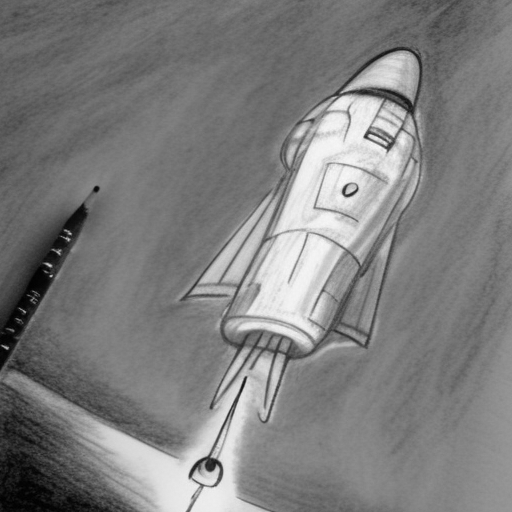

<IPython.core.display.Javascript object>

In [30]:
img2_grayscale

204.0

<IPython.core.display.Javascript object>